<a href="https://colab.research.google.com/github/mralamdari/YOLO/blob/main/Yolo_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
#install necessary libraries
!pip install awscli
!pip install ultralytics
clear_output()

#Data

In [ ]:
#clone OIDv4_ToolKit
!git clone https://github.com/mralamdari/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 499, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 499 (delta 32), reused 52 (delta 31), pack-reused 444
Receiving objects: 100% (499/499), 34.11 MiB | 35.00 MiB/s, done.
Resolving deltas: 100% (189/189), done.


In [ ]:
%cd OIDv4_ToolKit

#Write your desired objects (--classes) and data type (--type_csv)  and the number of images you want (--limit)

!python3 main.py downloader --classes Truck Person Tree --type_csv train --limit 200

In [ ]:
!python mralamdari_annotations_converter.py

Currently in subdirectory: train
Converting annotations for class: Tree
100% 200/200 [00:24<00:00,  8.15it/s]
Converting annotations for class: Person
100% 200/200 [00:17<00:00, 11.14it/s]
Converting annotations for class: Truck
100% 200/200 [00:04<00:00, 40.28it/s]


#Detection

In [ ]:
path = '/content/data/obj/train/'
os.makedirs('/content/train/images', exist_ok=True)
os.makedirs('/content/train/labels', exist_ok=True)

for j in os.listdir('/content/data/obj/train/'):
  for i in os.listdir(path+j):
    file_type = 'labels' if i[-4:] == '.txt' else 'images'
    os.rename(path+j+'/'+i, f'/content/train/{file_type}/{i}')

In [ ]:
with open('/content/config.yaml', 'w+') as f:
    config_files = f.write(f"""path: /content/train # dataset root dir
train: images  # train images (relative to 'path')
val: images  # val images (relative to 'path')


# Classes
names:
  0: Truck
  1: Person
  2: Tree""")

In [ ]:
from ultralytics import YOLO

# model = YOLO('yolov8n.pt')
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

results = model.train(data='/content/config.yaml', epochs=5)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
# os.makedirs(f'/content/data/train/images/', exist_ok=True)
# os.makedirs(f'/content/data/train/labels/', exist_ok=True)
# os.makedirs(f'/content/data/test/images/', exist_ok=True)
# os.makedirs(f'/content/data/test/labels/', exist_ok=True)


# path = '/content/data/obj/train/'
# DATA_ROOT = '/content/data/'

# VAL_THRESHOLD = 0.2

# for category in os.listdir(path):
#   category_path = path+category

#   for i in os.listdir(category_path):
#     if i[-4:] == '.txt':
#       file_name = i[:-4]
#       image_file = category_path + '/' + file_name + '.jpg'
#       label_file = category_path + '/' + file_name + '.txt'
#       rand_num = np.random.rand()
#       target = 'test' if rand_num <= VAL_THRESHOLD else 'train'
#       os.rename(image_file, f'/content/data/{target}/images/{file_name}.img')
#       os.rename(label_file, f'/content/data/{target}/labels/{file_name}.tx')

# os.rename('/content/data/obj', '/content/obj')
# os.rename('/content/data/obj.names', '/content/obj.names')
# os.rename('/content/data/train.txt', '/content/train.txt')

In [ ]:
# !scp -r runs '/content/drive/MyDrive/Computer Vision Projects/Yolo/'
!scp -r runs '/content/'

In [ ]:
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.149 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients
val: Scanning /content/train/labels.cache... 149 images, 0 backgrounds, 0 corrupt: 100%|██████████| 149/149 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:41<00:00,  4.18s/it]
                   all        149        391      0.785      0.487      0.611      0.415
                 Truck        149        199      0.823      0.257       0.44      0.271
                Person        149        117      0.788      0.504      0.657      0.449
                  Tree        149         75      0.745      0.701      0.736      0.527
Speed: 1.5ms preprocess, 214.3ms inference, 0.0ms loss, 10.9ms postprocess per image
Results saved to runs/detect/val


In [ ]:
results = model("/content/2.jpg")  # predict on an image


image 1/1 /content/2.jpg: 640x448 (no detections), 705.6ms
Speed: 9.7ms preprocess, 705.6ms inference, 14.5ms postprocess per image at shape (1, 3, 640, 448)


In [ ]:
results

In [ ]:
path = model.export(format="onnx")  # export the model to ONNX format

Pre trained

In [ ]:
# Load a model
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/Computer Vision Projects/Yolo/runs/detect/train5/weights/best.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="coco128.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set

In [ ]:
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/OIDv4_ToolKit/bus.jpg: 640x480 (no detections), 333.9ms
Speed: 5.7ms preprocess, 333.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: export success ✅ 2.6s, saved as 'runs/detect/train/weights/best.onnx' (12.2 MB)

Export complete (4.7s)
Results saved to /content/OIDv4_ToolKit/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=None 
Visualize:       https://netron.app


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



#Classification

Adjust dataset for the Classification task only

In [ ]:
labels = ['Tree', 'Person', 'Truck']

for label in labels:
  os.makedirs(f'/content/data/train/{label}', exist_ok=True)
  os.makedirs(f'/content/data/train/{label}', exist_ok=True)

  os.makedirs(f'/content/data/val/{label}', exist_ok=True)
  os.makedirs(f'/content/data/val/{label}', exist_ok=True)

In [ ]:
path = '/content/data/obj/train/'
DATA_ROOT = '/content/data/'

VAL_THRESHOLD = 0.2

for category in os.listdir(path):
  category_path = path+category

  for i in os.listdir(category_path):
    if i[-4:] == '.jpg':
      file_name = i
      image_file = category_path + '/' + i
      rand_num = np.random.rand()
      target = 'val' if rand_num <= VAL_THRESHOLD else 'train'
      os.rename(image_file, f'/content/data/{target}/{category}/{i}')

In [ ]:
os.rename('/content/data/obj', '/content/obj')
os.rename('/content/data/obj.names', '/content/obj.names')
os.rename('/content/data/train.txt', '/content/train.txt')

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')

results = model.train(data='/content/data', epochs=20)

In [ ]:
!scp -r runs '/content/drive/MyDrive/Computer Vision Projects/Yolo/'
!scp -r runs '/content/'

In [ ]:
metrics = model.val()
metrics.top1   # top1 accuracy

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]
                   all        0.8          1
Speed: 0.0ms preprocess, 16.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val2


0.800000011920929

In [ ]:
metrics.top5   # top5 accuracy

1.0

In [ ]:
results = model('/content/blue-truck-homepage-618x340.jpg')  # predict on an image


image 1/1 /content/blue-truck-homepage-618x340.jpg: 224x224 Truck 1.00, Person 0.00, Tree 0.00, 30.6ms
Speed: 1.8ms preprocess, 30.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


In [ ]:
results

In [ ]:
res = plt.imread('/content/blue-truck-homepage-618x340.jpg')
plt.imshow(res)

#Segmentation

[Dataset](https://www.kaggle.com/datasets/bulentsiyah/semantic-drone-dataset?select=dataset)

###Test Part
Create Segmentation test dataset and label it's maks

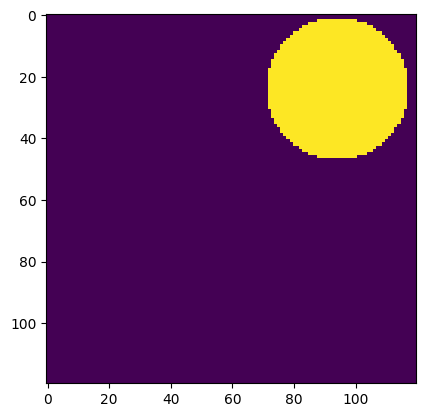

In [ ]:
import random
from PIL import Image
from skimage import draw
from pathlib import Path

def create_image(path, img_size, min_radius):
    path.parent.mkdir( parents=True, exist_ok=True )

    arr = np.zeros((img_size, img_size)).astype(np.uint8)
    center_x = random.randint(min_radius, (img_size-min_radius))
    center_y = random.randint(min_radius, (img_size-min_radius))
    max_radius = min(center_x, center_y, img_size - center_x, img_size - center_y)
    radius = random.randint(min_radius, max_radius)

    row_indxs, column_idxs = draw.ellipse(center_x, center_y, radius, radius, shape=arr.shape)

    arr[row_indxs, column_idxs] = 255

    im = Image.fromarray(arr)
    im.save(path)

def create_images(data_root_path, train_num, val_num, test_num, img_size=640, min_radius=10):
    data_root_path = Path(data_root_path)

    for i in range(train_num):
        create_image(data_root_path / 'train' / 'images' / f'img_{i}.png', img_size, min_radius)

    for i in range(val_num):
        create_image(data_root_path / 'val' / 'images' / f'img_{i}.png', img_size, min_radius)

    for i in range(test_num):
        create_image(data_root_path / 'test' / 'images' / f'img_{i}.png', img_size, min_radius)

create_images('datasets', train_num=120, val_num=40, test_num=40, img_size=120, min_radius=10)

path = '/content/datasets/train/images/img_100.png'

plt.imshow(plt.imread(path))

In [ ]:
!pip install rasterio
clear_output()

In [ ]:
from rasterio import features

def create_label(image_path, label_path):
    arr = np.asarray(Image.open(image_path))

    # There may be a better way to do it, but this is what I have found so far
    cords = list(features.shapes(arr, mask=(arr >0)))[0][0]['coordinates'][0]
    label_line = '0 ' + ' '.join([f'{int(cord[0])/arr.shape[0]} {int(cord[1])/arr.shape[1]}' for cord in cords])

    label_path.parent.mkdir( parents=True, exist_ok=True )
    with label_path.open('w') as f:
        f.write(label_line)

for images_dir_path in [Path(f'datasets/{x}/images') for x in ['train', 'val', 'test']]:
    for img_path in images_dir_path.iterdir():
        label_path = img_path.parent.parent / 'labels' / f'{img_path.stem}.txt'
        label_line = create_label(img_path, label_path)

In [ ]:
yaml_content = f'''
train: train/images
val: val/images
test: test/images

names: ['circle']
    '''

with Path('data.yaml').open('w') as f:
    f.write(yaml_content)

###Main part

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'
!kaggle datasets download -d bulentsiyah/semantic-drone-dataset
!unzip \*.zip && rm *.zip
clear_output()

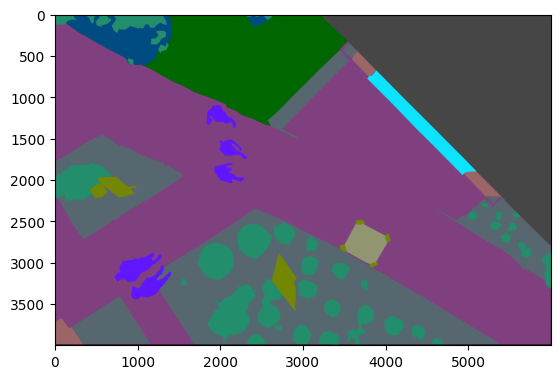

In [4]:
os.makedirs('/content/dataset/semantic_drone_dataset/labels', exist_ok=True)
img = cv2.imread('/content/RGB_color_image_masks/RGB_color_image_masks/163.png')
# plt.imshow(img)

In [5]:
data_csv = pd.read_csv('/content/class_dict_seg.csv')
data = pd.DataFrame(data_csv)

orignal_dir = '/content/dataset/semantic_drone_dataset/original_images'
darkmask_dir = '/content/dataset/semantic_drone_dataset/label_images_semantic'

input_dir = '/content/RGB_color_image_masks/RGB_color_image_masks'
# output_dir = '/content/dataset/semantic_drone_dataset/labels'
output_dir = '/content/drive/MyDrive/Labels'

In [ ]:
for p in os.listdir(input_dir):
  print(p)
  img_path = os.path.join(input_dir, p)
  img = cv2.imread(img_path)

  polygons = []
  W, H = img.shape[:-1]
  for seg_cls in data.index:
    mask_color = [data[' r'][seg_cls], data[' g'][seg_cls], data[' b'][seg_cls]]
    layer1 = img[:, :, 0] == np.ones((W, H))*mask_color[0]
    layer2 = img[:, :, 1] == np.ones((W, H))*mask_color[1]
    layer3 = img[:, :, 2] == np.ones((W, H))*mask_color[2]
    mask = (layer1 + layer2 + layer3) * 255

    if np.sum(mask) == 0: # Not Detected any labeled space
      continue

    contours, hierarchy = cv2.findContours(image=np.array(mask, np.uint8), mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
    # convert the contours to polygons
    for cnt in contours:
        if cv2.contourArea(cnt) > 200:
            polygon = [seg_cls]
            for point in cnt:
                x, y = point[0]
                if x > W or y > H:
                  x = W - 1e-4
                  y = H - 1e-4
                polygon.append(x / W)
                polygon.append(y / H)
            polygons.append(polygon)


  print(f'The Image {p} has {len(polygons)} Polygons')
  # print the polygons
  with open(f'{os.path.join(output_dir, p)[:-4]}.txt', 'w+') as f:
      for polygon in polygons:
          f.write(' '.join([str(g) for g in polygon])+'\n')

544.png


In [ ]:
os.rename('/content/dataset/semantic_drone_dataset/label_images_semantic', '/content/dataset/label_images_semantic')

In [ ]:
os.makedirs('/content/data', exist_ok=True)
os.replace('/content/dataset/semantic_drone_dataset/original_images', '/content/data/images')
shutil.copytree('/content/drive/MyDrive/Labels', '/content/data/labels')

Train / Val Split

In [ ]:
os.makedirs('/content/data/images/train', exist_ok=True)
os.makedirs('/content/data/images/val', exist_ok=True)

os.makedirs('/content/data/labels/train', exist_ok=True)
os.makedirs('/content/data/labels/val', exist_ok=True)

In [ ]:
img_path = '/content/data/images/'
val_threshold = 0.2

for img_name in os.listdir(img_path):
  if img_name == 'train' or img_name == 'val':
    continue

  file_name = img_name[:-4]
  if np.random.randn() < 0.2:
    os.replace(f'/content/data/images/{file_name}.jpg', f'/content/data/images/val/{file_name}.jpg')
    os.replace(f'/content/data/labels/{file_name}.txt', f'/content/data/labels/val/{file_name}.txt')
  else:
    os.replace(f'/content/data/images/{file_name}.jpg', f'/content/data/images/train/{file_name}.jpg')
    os.replace(f'/content/data/labels/{file_name}.txt', f'/content/data/labels/train/{file_name}.txt')

In [10]:
with open('/content/config.yaml', 'w+') as f:
    config_files = f.write(f"""path: /content/data # dataset root dir
train: images  # train images (relative to 'path')
val: images  # val images (relative to 'path')


# Classes
names:
  0: unlabeled
  1: paved-area
  2: dirt
  3: grass
  4: gravel
  5: water
  6: rocks
  7: pool
  8: vegetation
  9: roof
  10: wall
  11: window
  12: door
  13: fence
  14: fence-pole
  15: person
  16: dog
  17: car
  18: bicycle
  19: tree
  20: bald-tree
  21: ar-marker
  22: obstacle
  23: conflicting
  """)

In [11]:
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt")

results = model.train(
        batch=4,
        device="cpu",
        data="config.yaml",
        epochs=8,
        imgsz=640,
    )

# results = model.train(data='coco128-seg.yaml', epochs=10, imgsz=640)

Ultralytics YOLOv8.0.162 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=config.yaml, epochs=8, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False,

AssertionError: ignored

In [ ]:
from ultralytics.data.annotator import auto_annotate

auto_annotate(data="/content/data/images/train", det_model="yolov8x.pt", sam_model='sam_b.pt', device='cpu')

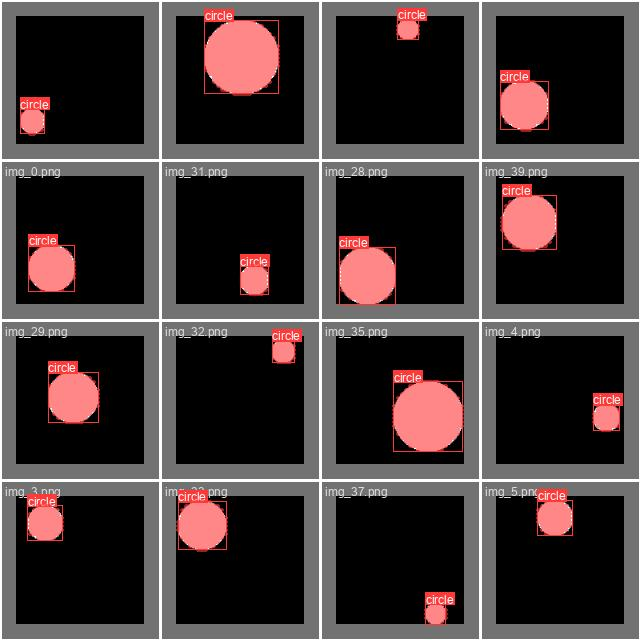

In [ ]:
from IPython.display import Image as show_image
show_image(filename="runs/segment/train/val_batch0_labels.jpg")

In [ ]:
#Predict

results = model(img)
for result in results:
  for i, mask in enumerata(results.maks.data):
    mask = mask.numpy() * 255
    mask = cv2.resize(mask, (W, H))
    cv2.imwrite('./output.png', mask)